이전 스텝에서 분류모델의 분류기준(Threshold)을 변경함에 따라 동일한 모델에서도 Precision, Recall 등 평가척도 값이 달라지는 것을 확인했습니다. PR(Precision-Recall) 커브는 Recall을 X축, Precision을 Y축에 놓고 Threshold 변화에 따른 두 값의 변화를 그래프로 그린 것입니다.

위 사례의 PR 커브를 그려 보겠습니다.

# 이전 코드

In [2]:
# 코드를 통한 실습
# 사이킷런에서 제공하는 데이터셋을 사용하는 방법을 알아봅니다.
# 사이킷런에서 제공하는 데이터셋은 딕셔너리 형태로 되어 있습니다.
# 데이터셋을 불러오고, 데이터셋의 형태를 확인해봅니다.
# 데이터셋을 불러오는 방법은 datasets 모듈을 불러오고, load_데이터셋명() 함수를 사용합니다.
from sklearn import datasets

from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)  # 4개의 feature를 가진 150개의 데이터입니다.
random_state = np.random.RandomState(0) # seed를 고정합니다.
n_samples, n_features = X.shape # 150개의 데이터와 4개의 feature가 있습니다.
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)] # np.c_[]를 사용하여 feature를 추가합니다.
# X는 random_state.randn(n_samples, 200 * n_features)를 추가하게 되면 804개의 feature를 가진 150개의 데이터가 됩니다.

print(X.shape)  # 804개의 feature를 가진 150개의 데이터가 되었습니다.
#- 0, 1 라벨에 속하는 붓꽃 샘플만 사용하도록 제한합니다.
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

print("훈련, 테스트 셋에 사용된 라벨의 종류: {} ".format( set(y_test)))
print("훈련 데이터 shape   :", X_train.shape)
print("테스트 데이터 shape :", X_test.shape)
# 두개의 라벨로 나뉜 데이터를 가지고, SVM(Support Vector Machine)을 사용하여 분류를 해봅니다.
# SVM은 데이터를 분류하는 경계선을 찾아주는 알고리즘입니다.
# SVM은 선형 분류와 비선형 분류를 모두 지원합니다.
# 여기서는 비선형 분류를 위해 kernel='poly'를 사용합니다.
# test 데이터에 대한 정확도를 출력합니다.
from sklearn import svm

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)
# kernel='poly' 대신 kernel='linear'를 사용하면 선형 분류를 수행합니다.
# test 데이터에 대한 정확도를 출력합니다.
classifier = svm.SVC(kernel='linear', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)
# classifer.predict() 함수를 사용하여 테스트 데이터에 대한 예측을 수행합니다.
classifier.predict(X_test)
y_test
y_score = classifier.decision_function(X_test)
print(y_score)
from sklearn.metrics import confusion_matrix, classification_report

y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred)
print(rpt_result)
y_pred_new_threshold = classifier.decision_function(X_test) > -0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)
y_pred_new_threshold = classifier.decision_function(X_test) > -0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)
y_pred_new_threshold = classifier.decision_function(X_test) > 0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)
y_pred_new_threshold = classifier.decision_function(X_test) > 0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

(150, 4)
(150, 804)
훈련, 테스트 셋에 사용된 라벨의 종류: {np.int64(0), np.int64(1)} 
훈련 데이터 shape   : (50, 804)
테스트 데이터 shape : (50, 804)
[-0.29512751  0.28798352  0.17635465  0.19056886  0.38391605 -0.30841065
 -0.10084254 -0.23481309  0.18576987 -0.36011033 -0.15726747 -0.25714889
 -0.14979669  0.02063898  0.04509171 -0.17239443  0.07287957 -0.0689103
 -0.13452462 -0.30697712  0.25404241 -0.28916471 -0.52061453  0.25252233
  0.02177777 -0.10980907  0.37468422  0.35303004 -0.6211302  -0.42920064
 -0.14770647  0.00593404 -0.34735296  0.32245409 -0.19439024  0.1288847
 -0.0320947  -0.23008604 -0.10135548 -0.46962186  0.05184235  0.0609688
  0.05632596  0.44769206 -0.38804349  0.24704844  0.16063684  0.0144203
 -0.03136574  0.11179177]
[[20  4]
 [ 6 20]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.83      0.77      0.80        26

    accuracy                           0.80        50
   macro avg       0.80      0.80

# 📈PR Curve

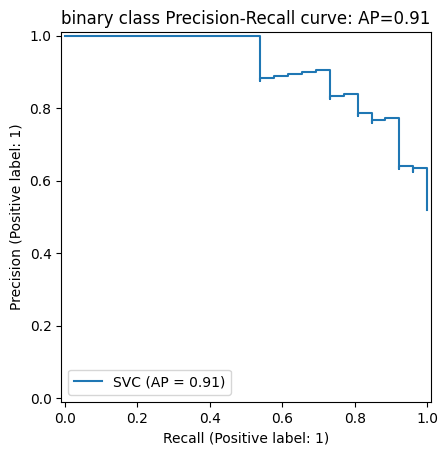

In [4]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(disp.average_precision))

plt.show()

위 그림을 보면 Precision과 Recall 사이의 트레이드오프 관계를 확인할 수 있습니다. Threshold값에 따라 우리가 얻게 되는 Precision, Recall 값은 저 그래프상의 어딘가가 될 것입니다. 물론 우리가 원하는 값은 Precision이든 Recall이든 모두 1에 가깝기를 원합니다. 이상적으로는 그래프가 (1, 1)에 찍히면 좋겠습니다만, 가급적 위 그래프가 (1, 1)에 근접하도록 그려지길 바랍니다.

그래서 Threshold 값에 무관하게 모델의 전체적인 성능을 평가하는 방법으로, 위 PR 커브 아래쪽 면적을 계산하는 방법이 있습니다. 이것을 AUC(Area Under Curve) 값이라고 합니다. PR AUC를 계산하는 방법으로 다음과 같이 사이킷런에서 제공하는 `average_precision_score` 함수를 사용합니다.

In [5]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.91


In [8]:
# Q. 모델을 SVM의 'poly' 커널을 사용하여 average_precision_score를 구하세요.
from sklearn.metrics import average_precision_score

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(average_precision))

평균 precision-recall score: 0.90
